<div style="background-color: #f4f4f4; padding: 20px; border-radius: 15px; text-align: center; box-shadow: 0px 4px 10px rgba(0,0,0,0.1);">
    <img src="../doc/img/logo/AeneasHDC_white.png" width="25%" style="background-color: #2D3748; margin-bottom: 10px; border-radius: 10px; ">
    <h1 style="color: #2D3748; font-size: 36px; font-weight: bold;text-align:center;">Aeneas HyperCompute Platform</h1>
</div>


In [1]:
import sys
import json
import os

# Change current directory
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
sys.path.append(os.path.dirname(current_dir))
sys.path.append('./main/')  
sys.path.append('./src/config/')
sys.path.append('./usr_config')

import notebook_setup as aeneas_style
aeneas_style.setup_html_css()
aeneas_style.setup_html_css()
from datetime import datetime
import config_py as config
from main import Aeneas

<div style="background-color: #2D3748; padding: 8px 12px; margin: 5px 0; border-radius: 4px; color: white; font-size: 20px; font-weight: bold;">Model Initialization </div>


In [17]:
print("Initialising Aeneas...")
aeneas = Aeneas()

# Uncomment if you want to change again the configuration through the GUI
# aeneas.configuration.run_gui()
aeneas.configuration.read()
aeneas.configuration.save()
aeneas.configuration.compile()

print("Selected Configuration...")
aeneas.configuration.print()


def setup_test(aeneas, test_id, test_name, summary):
    aeneas.prj.set_name(test_name)
    aeneas.prj.set_id(test_id)
    aeneas.prj.set_test_summary(summary)
    aeneas.prj.date = datetime.now()
    aeneas.prj.time = datetime.now()
    aeneas.prj.create_project()
    
# Set here the project name
setup_test(aeneas, 1, 'Test', 'test project') 


Initialising Aeneas...
Selected Configuration...


<div style="background-color: #2D3748; padding: 8px 12px; margin: 5px 0; border-radius: 4px; color: white; font-size: 20px; font-weight: bold;">Software Model </div>


In [18]:
print("Running the Software Model...")
report = {}
report['ModelResults'] = aeneas.model.run()
report['ModelEval'] = aeneas.model.get_eval()

Running the Software Model...
Called from runfile
------------------
HDC model:
Problem type: 0
Dataset: CARDIO
HV dimensionality: 512
HV data type: 0
HV mode: 0
HV level type: 0
HV level length: 32
HV similarity method: 1
HV Encoding method: 0
HV sparsity factor: 5
HV clipping encoding: 1
HV clipping class: 1
N-gram: 0
N-gram size: 1
Retrain: 0
Epochs: 10
Learning rate: 10
Learning rate decay: 0
Beta learning rate: 3
------------------

-1  :  (0, 0)
0  :  (1, 1)
1  :  (2, 3)
2  :  (4, 6)
3  :  (7, 12)
4  :  (13, 24)
5  :  (25, 48)
6  :  (49, 64)
Classification problem
Iteration: 0 Progress: 0.0 %
Iteration: 159 Progress: 10.0 %
Iteration: 318 Progress: 20.0 %
Iteration: 477 Progress: 30.0 %
Iteration: 636 Progress: 40.0 %
Iteration: 795 Progress: 50.0 %
Iteration: 954 Progress: 60.0 %
Iteration: 1113 Progress: 70.0 %
Iteration: 1272 Progress: 80.0 %
Iteration: 1431 Progress: 90.0 %
Iteration: 1590 Progress: 100.0 %
------------------
Testing procedure:
Progress: 10.0 % ---> accuracy:

Evaluation results Model...
{'accuracy': 0.6616541353383458, 'precision': 0.5525110528165985, 'recall': 0.7103839205058717, 'f1_score': 0.5704522101167947, 'roc_auc': 0.7813091572492953, 'confusion_matrix': [[259, 71, 80], [10, 59, 3], [0, 16, 34]]}


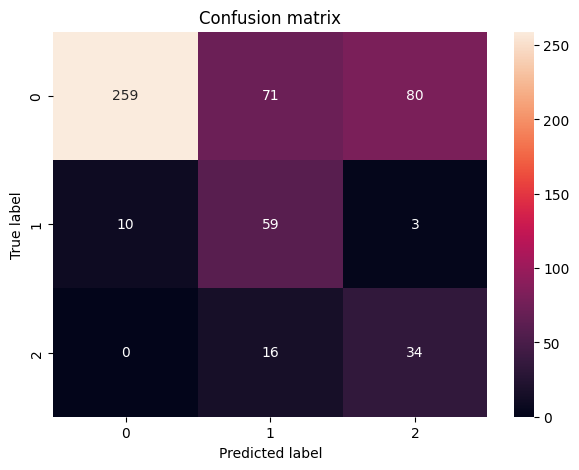

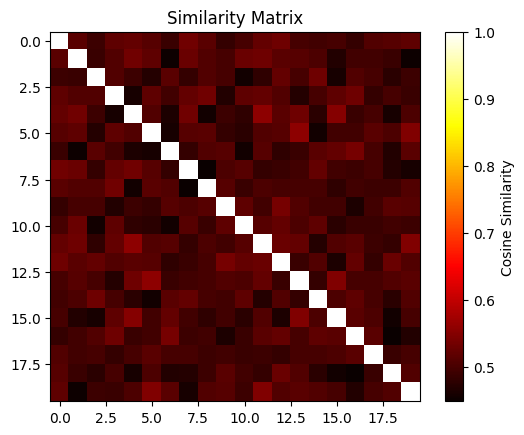

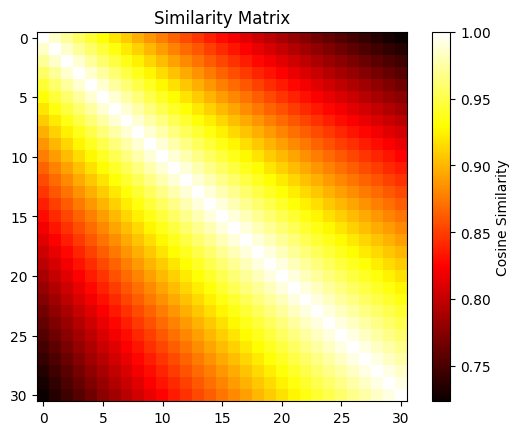

In [19]:
print("Evaluation results Model...")
results = aeneas.model.get_eval();
print(results)
results = aeneas.visualizer.plot_confusion_matrix(results['confusion_matrix']);
base_vector = aeneas.model.get_base_vector()
base_similarity_matrix = aeneas.vectorutils.compute_similarity_matrix(base_vector)

level_vector = aeneas.model.get_level_vector()
level_similarity_matrix = aeneas.vectorutils.compute_similarity_matrix(level_vector)

aeneas.visualizer.plot_similarity_matrix(base_similarity_matrix)
aeneas.visualizer.plot_similarity_matrix(level_similarity_matrix)

<div style="background-color: #2D3748; padding: 8px 12px; margin: 5px 0; border-radius: 4px; color: white; font-size: 20px; font-weight: bold;">Hardware Model </div>


In [20]:
print("Generating the Hardware Model using VitisHLS...")
aeneas.hdl.run_simulation()
print("Synthesizing the Hardware Model using Vivado...")
aeneas.hdl.run_synthesis()


Generating the Hardware Model using VitisHLS...
Synthesizing the Hardware Model using Vivado...


In [21]:
print("--------------------")
print("HARDWARE REPORT ")
print("--------------------")
print("Performance:")
perf=aeneas.hdl.get_eval()
print(perf)

print("--------------------")
resource = aeneas.hdl.get_resource_usage_report();
print("Resource utility:")
for key, val in resource.items():
    print(f"{key}: {val}")
power = aeneas.hdl.get_power_estimation_report();

print("--------------------")
print("Power report:")
for key, val in power.items():
    print(f"{key}: {val}")
    
print("--------------------")  
exe_time = aeneas.hdl.get_timing_report();
print("Timing report:")
class_sec = 1e9/exe_time;
print("Speed: ", class_sec, "(Classification/Sec)")

report['HD_Eval'] = aeneas.hdl.get_eval()
report['ResourceUtility'] = aeneas.hdl.get_resource_usage_report()
report['PowerReport'] = aeneas.hdl.get_power_estimation_report()
report['TimingReport'] = aeneas.hdl.get_timing_report()
report['Speed'] = 1e9 / report['TimingReport']

--------------------
HARDWARE REPORT 
--------------------
Performance:
{'accuracy': 0.719925, 'precision': 0.591334, 'recall': 0.739404, 'f1_score': 0.621894, 'confusion_matrix': [[289, 73, 48], [10, 60, 2], [0, 16, 34]]}
--------------------
Resource utility:
LUT as Logic: 3122
LUT as Memory: 0
CLB Registers: 2781
Register as Flip Flop: 2781
Register as Latch: 0
CARRY8: 264
DSPs: 0
Total LUTs: 3122
Total FF: 5562
--------------------
Power report:
Dynamic (W): 0.011
Device Static (W): 0.62
--------------------
Timing report:
Speed:  113636.36363636363 (Classification/Sec)


<div style="background-color: #2D3748; padding: 8px 12px; margin: 5px 0; border-radius: 4px; color: white; font-size: 20px; font-weight: bold;">Report </div>


In [23]:
aeneas.prj.save()

print("AeneasHDC succesfully generated the required HDC models in software and hardware. Check the obtained results on the dedicated HTML page.")
#!! FIX THE HTML REPORT
aeneas.report.open()

Error saving project: [WinError 183] Cannot create a file when that file already exists: '.\\rep\\Test_1_21_06_2024_12_48_09\\dataset'
AeneasHDC succesfully generated the required HDC models in software and hardware. Check the obtained results on the dedicated HTML page.
